# EDA

In [1]:
import os

import numpy as np
import pandas as pd

import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns

from config import *

## import data

In [2]:
df = pd.read_csv(args['train_path'])
print(df.shape)
df.head()

(14838, 38)


id     BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v   
0   0  323.390782   9.879918  5.875576   5.875576  4.304757   4.304757  \
1   1  273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2   2  521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3   3  567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4   4  112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   

      Chi3v     Chi4n  EState_VSA1  ...  SlogP_VSA3  VSA_EState9  fr_COO   
0  2.754513  1.749203     0.000000  ...    4.794537    35.527357       0  \
1  2.201375  1.289775    45.135471  ...   13.825658    44.707310       0   
2  5.824822  1.770579    15.645394  ...   17.964475    45.660120       0   
3  7.914542  3.067181    95.639554  ...   31.961948    87.509997       0   
4  1.036450  0.727664    17.980451  ...    9.589074    33.333333       2   

   fr_COO2  EC1  EC2  EC3  EC4  EC5  EC6  
0        0    1    1    0    0    0    0  
1        0    0    1    1    0    0    0  
2        0    1    1    0    0    1    0  
3        0    1    1    0    0    0    0  
4        2    1    0    1    1    1    0  

[5 rows x 38 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [4]:
df_X = df.drop(columns=['id', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'])
df_y = df[['EC1', 'EC2']]

data_descr

In [5]:
cont_cols = []
bin_cols = []
cat_cols = []

for colname in df_X.columns[1:]:
    if df_X[colname].dtype in ['int64', 'float64']:
        if len(df_X[colname].dropna().unique()) == 2:
            bin_cols.append(colname)
        else:
            cont_cols.append(colname)
    else:
        cat_cols.append(colname)

len(cont_cols), len(bin_cols), len(cat_cols)

(30, 0, 0)

수치형 데이터의 분포

In [6]:
print("num_cols: ", cont_cols)

num_cols:  ['Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha', 'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex', 'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9', 'fr_COO', 'fr_COO2']


In [7]:
df_X[cont_cols].describe()

Chi1         Chi1n         Chi1v         Chi2n         Chi2v   
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000  \
mean       9.135189      5.854307      6.738497      4.432570      5.253221   
std        6.819989      4.647064      5.866444      3.760516      4.925065   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        4.680739      2.844556      2.932842      1.949719      2.034468   
50%        6.485270      4.052701      4.392859      2.970427      3.242775   
75%       11.170477      7.486791      8.527859      5.788793      6.609350   
max       69.551167     50.174588     53.431954     32.195368     34.579313   

              Chi3v         Chi4n   EState_VSA1   EState_VSA2    ExactMolWt   
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000  \
mean       3.418749      1.773472     29.202823     10.435316    292.623087   
std        3.436208      1.865898     31.728679     13.651843    225.384140   
min        0.000000      0.000000      0.000000      0.000000      1.007276   
25%        1.160763      0.503897      5.969305      0.000000    148.037173   
50%        1.948613      1.073261     17.353601      6.420822    206.042653   
75%        4.502070      2.534281     44.876559     12.841643    343.090331   
max       22.880836     16.072810    363.705954     99.936429   2237.318490   

       ...    PEOE_VSA14     PEOE_VSA6     PEOE_VSA7     PEOE_VSA8   
count  ...  14838.000000  14838.000000  14838.000000  14838.000000  \
mean   ...     17.790011      8.962440     11.318811      6.704487   
std    ...     34.561655     19.756727     20.169745     10.865415   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      5.969305      0.000000      0.000000      0.000000   
75%    ...     15.645394     12.132734     13.847474      6.923737   
max    ...    482.434223    375.425148    211.501279    100.348416   

          SMR_VSA10      SMR_VSA5    SlogP_VSA3   VSA_EState9        fr_COO   
count  14838.000000  14838.000000  14838.000000  14838.000000  14838.000000  \
mean      15.666766     31.066423     13.636941     49.309959      0.458215   
std       18.080208     33.896638     14.598554     29.174824      0.667948   
min        0.000000      0.000000      0.000000     -5.430556      0.000000   
25%        5.969305      6.420822      4.794537     30.000000      0.000000   
50%       11.752550     20.075376      9.589074     41.666667      0.000000   
75%       17.721856     42.727765     14.912664     56.090650      1.000000   
max       80.742293    492.729739    115.406157    384.450519      8.000000   

            fr_COO2  
count  14838.000000  
mean       0.459226  
std        0.668111  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        8.000000  

[8 rows x 30 columns]

array([[<Axes: title={'center': 'Chi1'}>,
        <Axes: title={'center': 'Chi1n'}>,
        <Axes: title={'center': 'Chi1v'}>,
        <Axes: title={'center': 'Chi2n'}>,
        <Axes: title={'center': 'Chi2v'}>],
       [<Axes: title={'center': 'Chi3v'}>,
        <Axes: title={'center': 'Chi4n'}>,
        <Axes: title={'center': 'EState_VSA1'}>,
        <Axes: title={'center': 'EState_VSA2'}>,
        <Axes: title={'center': 'ExactMolWt'}>],
       [<Axes: title={'center': 'FpDensityMorgan1'}>,
        <Axes: title={'center': 'FpDensityMorgan2'}>,
        <Axes: title={'center': 'FpDensityMorgan3'}>,
        <Axes: title={'center': 'HallKierAlpha'}>,
        <Axes: title={'center': 'HeavyAtomMolWt'}>],
       [<Axes: title={'center': 'Kappa3'}>,
        <Axes: title={'center': 'MaxAbsEStateIndex'}>,
        <Axes: title={'center': 'MinEStateIndex'}>,
        <Axes: title={'center': 'NumHeteroatoms'}>,
        <Axes: title={'center': 'PEOE_VSA10'}>],
       [<Axes: title={'center': 'P

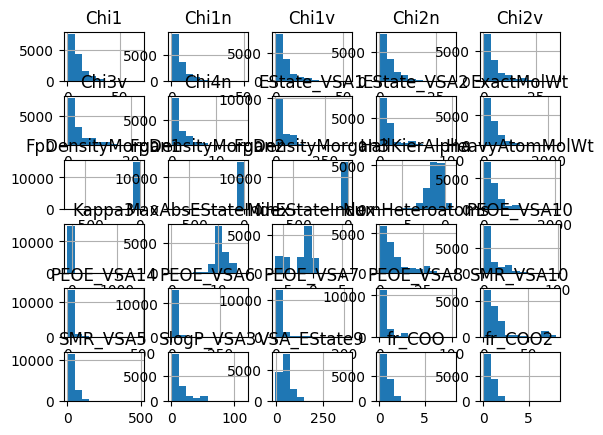

In [8]:
df_X[cont_cols].hist()

In [9]:
from scipy.stats import skew

In [10]:
positive_skewed_cols = []
negative_skewed_cols = []

for col in cont_cols:
    # Calculate skewness
    skewness = skew(df_X[col], nan_policy='omit')
    exceptions = len(df_X[col].unique()) > 2
    print(f"{col} skewness: ", skewness)
    if (skewness >= 1) and exceptions:
        positive_skewed_cols.append(col)
    elif (skewness <= -1) and exceptions:
        negative_skewed_cols.append(col)

print(positive_skewed_cols)
print(negative_skewed_cols)

Chi1 skewness:  1.6791984236867468
Chi1n skewness:  1.7226812164865286
Chi1v skewness:  1.782397608235537
Chi2n skewness:  1.6669751607908345
Chi2v skewness:  1.7480833211081985
Chi3v skewness:  1.6443651396327787
Chi4n skewness:  1.8937380479815344
EState_VSA1 skewness:  1.4258654439967478
EState_VSA2 skewness:  1.9141272113098815
ExactMolWt skewness:  1.7086727564427568
FpDensityMorgan1 skewness:  -120.91803595339226
FpDensityMorgan2 skewness:  -120.94861730641139
FpDensityMorgan3 skewness:  -120.81785302348518
HallKierAlpha skewness:  -1.2552515683823164
HeavyAtomMolWt skewness:  1.7039412984134539
Kappa3 skewness:  26.416940304081177
MaxAbsEStateIndex skewness:  -1.6985629382120528
MinEStateIndex skewness:  -0.6113434125865632
NumHeteroatoms skewness:  1.564714517691826
PEOE_VSA10 skewness:  1.3543704551136013
PEOE_VSA14 skewness:  4.529272723796346
PEOE_VSA6 skewness:  4.41508487226548
PEOE_VSA7 skewness:  3.1043170633647006
PEOE_VSA8 skewness:  2.0413324249693408
SMR_VSA10 skewne

In [11]:
print('======= positive skewed transform =======')
for col in positive_skewed_cols:
    # log transform
    df_X[col] = np.log1p(df_X[col])
    print(col)

print('======= negative skewed transform =======')
for col in negative_skewed_cols:
    df_X[col] = np.expm1(df_X[col])
    print(col)

======= positive skewed transform =======
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3v
Chi4n
EState_VSA1
EState_VSA2
ExactMolWt
HeavyAtomMolWt
Kappa3
NumHeteroatoms
PEOE_VSA10
PEOE_VSA14
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
SMR_VSA10
SMR_VSA5
SlogP_VSA3
VSA_EState9
fr_COO
fr_COO2
======= negative skewed transform =======
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
HallKierAlpha
MaxAbsEStateIndex


/home/jylee/miniconda3/envs/recommender/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
# 이전보다 좋아진 것을 확인
for col in cont_cols:
    # Calculate skewness
    skewness = skew(df_X[col], nan_policy='omit')
    print(f"{col} skewness: ", skewness)

Chi1 skewness:  0.24699504112582332
Chi1n skewness:  0.20869047399730353
Chi1v skewness:  0.29725480839158525
Chi2n skewness:  0.22171715151815513
Chi2v skewness:  0.31547768400872733
Chi3v skewness:  0.3793012237021088
Chi4n skewness:  0.4795509758655497
EState_VSA1 skewness:  -0.5899703145693511
EState_VSA2 skewness:  -0.045148727998210236
ExactMolWt skewness:  0.012632028009338691
FpDensityMorgan1 skewness:  4.586648165589783
FpDensityMorgan2 skewness:  1.769726166170108
FpDensityMorgan3 skewness:  0.5476025916224421
HallKierAlpha skewness:  1.028659241828494
HeavyAtomMolWt skewness:  -0.004764414938001626
Kappa3 skewness:  1.390308571267711
MaxAbsEStateIndex skewness:  9.201198499299311
MinEStateIndex skewness:  -0.6113434125865632
NumHeteroatoms skewness:  0.383789135572717
PEOE_VSA10 skewness:  0.05727064059470503
PEOE_VSA14 skewness:  0.03607601903300947
PEOE_VSA6 skewness:  0.9864400004530572
PEOE_VSA7 skewness:  0.39979282122656556
PEOE_VSA8 skewness:  0.578339639809883
SMR_VS

In [13]:
# for col in num_cols:
#     iqr = df[col].quantile(q=.75) - df[col].quantile(q=.25)
#     lower_bound = df[col].quantile(q=.25) - iqr * 1.5
#     upper_bound = df[col].quantile(q=.75) + iqr * 1.5
#     # print(lower_bound, upper_bound)

#     number_of_outliers = df[
#         (df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
#     print(number_of_outliers)
    
#     df.loc[df[col] < lower_bound, col] = lower_bound
#     df.loc[df[col] > upper_bound, col] = upper_bound

In [14]:
df[cont_cols]

Chi1     Chi1n      Chi1v     Chi2n      Chi2v     Chi3v   
0       9.879918  5.875576   5.875576  4.304757   4.304757  2.754513  \
1       7.259037  4.441467   5.834958  3.285046   4.485235  2.201375   
2      10.911303  8.527859  11.050864  6.665291   9.519706  5.824822   
3      12.453343  7.089119  12.833709  6.478023  10.978151  7.914542   
4       4.414719  2.866236   2.866236  1.875634   1.875634  1.036450   
...          ...       ...        ...       ...        ...       ...   
14833  10.911303  6.579933   9.179964  4.653583   6.030052  3.670528   
14834   2.642734  1.446898   1.446898  0.879497   0.879497  0.174620   
14835  10.363081  6.146219   6.146219  4.700576   4.700576  3.064846   
14836   9.949161  6.589761   7.848913  5.276568   5.476436  3.978973   
14837  15.671142  9.896164  10.234264  7.860296   8.522605  5.645502   

          Chi4n  EState_VSA1  EState_VSA2  ExactMolWt  ...  PEOE_VSA14   
0      1.749203     0.000000    11.938294  222.068080  ...   91.536492  \
1      1.289775    45.135471     0.000000  260.029719  ...    7.822697   
2      1.770579    15.645394     6.606882  382.131027  ...   15.645394   
3      3.067181    95.639554     0.000000  530.070277  ...   21.335138   
4      0.727664    17.980451    12.841643  118.062994  ...   11.938611   
...         ...          ...          ...         ...  ...         ...   
14833  1.770579    32.971529     6.606882  347.063084  ...   15.645394   
14834  0.000000     0.000000     0.000000   74.024203  ...    0.000000   
14835  2.133897    17.248535     0.000000  297.089560  ...    0.000000   
14836  2.299833    45.623794     0.000000  265.959270  ...    7.822697   
14837  3.312893    82.448246     5.687386  437.234828  ...   15.645394   

       PEOE_VSA6  PEOE_VSA7  PEOE_VSA8  SMR_VSA10    SMR_VSA5  SlogP_VSA3   
0       0.000000   0.000000   0.000000  17.744066    0.000000    4.794537  \
1       0.000000   0.000000   0.000000   7.822697   30.705892   13.825658   
2       0.000000  53.378235   0.000000  15.645394   73.143616   17.964475   
3       0.000000   0.000000   6.420822  15.645394   62.107304   31.961948   
4       6.923737  19.386400   0.000000  11.938611   18.883484    9.589074   
...          ...        ...        ...        ...         ...         ...   
14833   0.000000  13.847474   6.923737  34.407699   32.607024   18.947452   
14834   0.000000   0.000000   6.066367   0.000000    6.420822    0.000000   
14835   0.000000   0.000000  23.762553  10.969244    0.000000    0.000000   
14836  19.420579   0.000000   0.000000   7.822697  108.961047    9.088795   
14837   0.000000  37.107112   0.000000  32.757611   38.704130   22.701338   

       VSA_EState9  fr_COO  fr_COO2  
0        35.527357       0        0  
1        44.707310       0        0  
2        45.660120       0        0  
3        87.509997       0        0  
4        33.333333       2        2  
...            ...     ...      ...  
14833    61.376610       0        0  
14834    10.000000       0        0  
14835    66.666667       0        0  
14836    45.583333       0        0  
14837    71.127044       0        0  

[14838 rows x 30 columns]

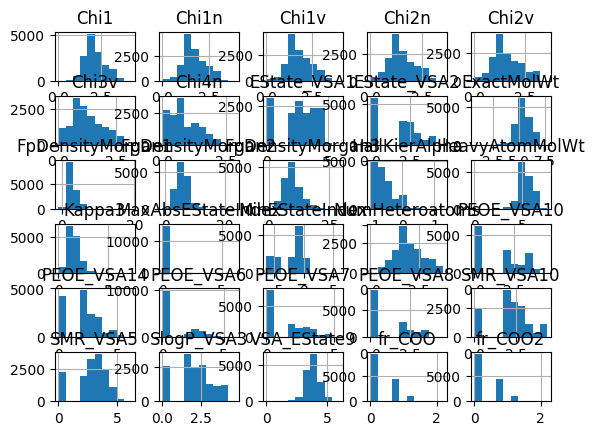

In [15]:
df_X.hist(column=cont_cols)
plt.show()

이진형 변수 검토

In [16]:
# df_X[bin_cols].describe()

범주형 데이터의 분포

In [17]:
# df_X[cat_cols].describe()

In [18]:
# onehot_cols = []
# for colname in cat_cols:
#     if len(df_X[colname].unique()) \
#         <= df_X.shape[0]*0.1:
#         onehot_cols.append(colname)

# preprocessing

In [19]:
# # from sklearn.preprocessing import OneHotEncoder
# from sklearn.impute import KNNImputer

In [20]:
# for col in onehot_cols:
#     mode = df[col].mode()[0]
#     df[col].fillna(mode, inplace=True)

In [21]:
# ohe = OneHotEncoder()
# ohe = ohe.fit(df[onehot_cols])
# ohe.get_feature_names_out()

In [22]:
# df_cat_array = ohe.transform(df[onehot_cols]).toarray()
# df_cat_array.shape

In [23]:
# df[ohe.get_feature_names_out()] = df_cat_array
# df = df.drop(columns=cat_cols)

# Correlation analysis with Pearson

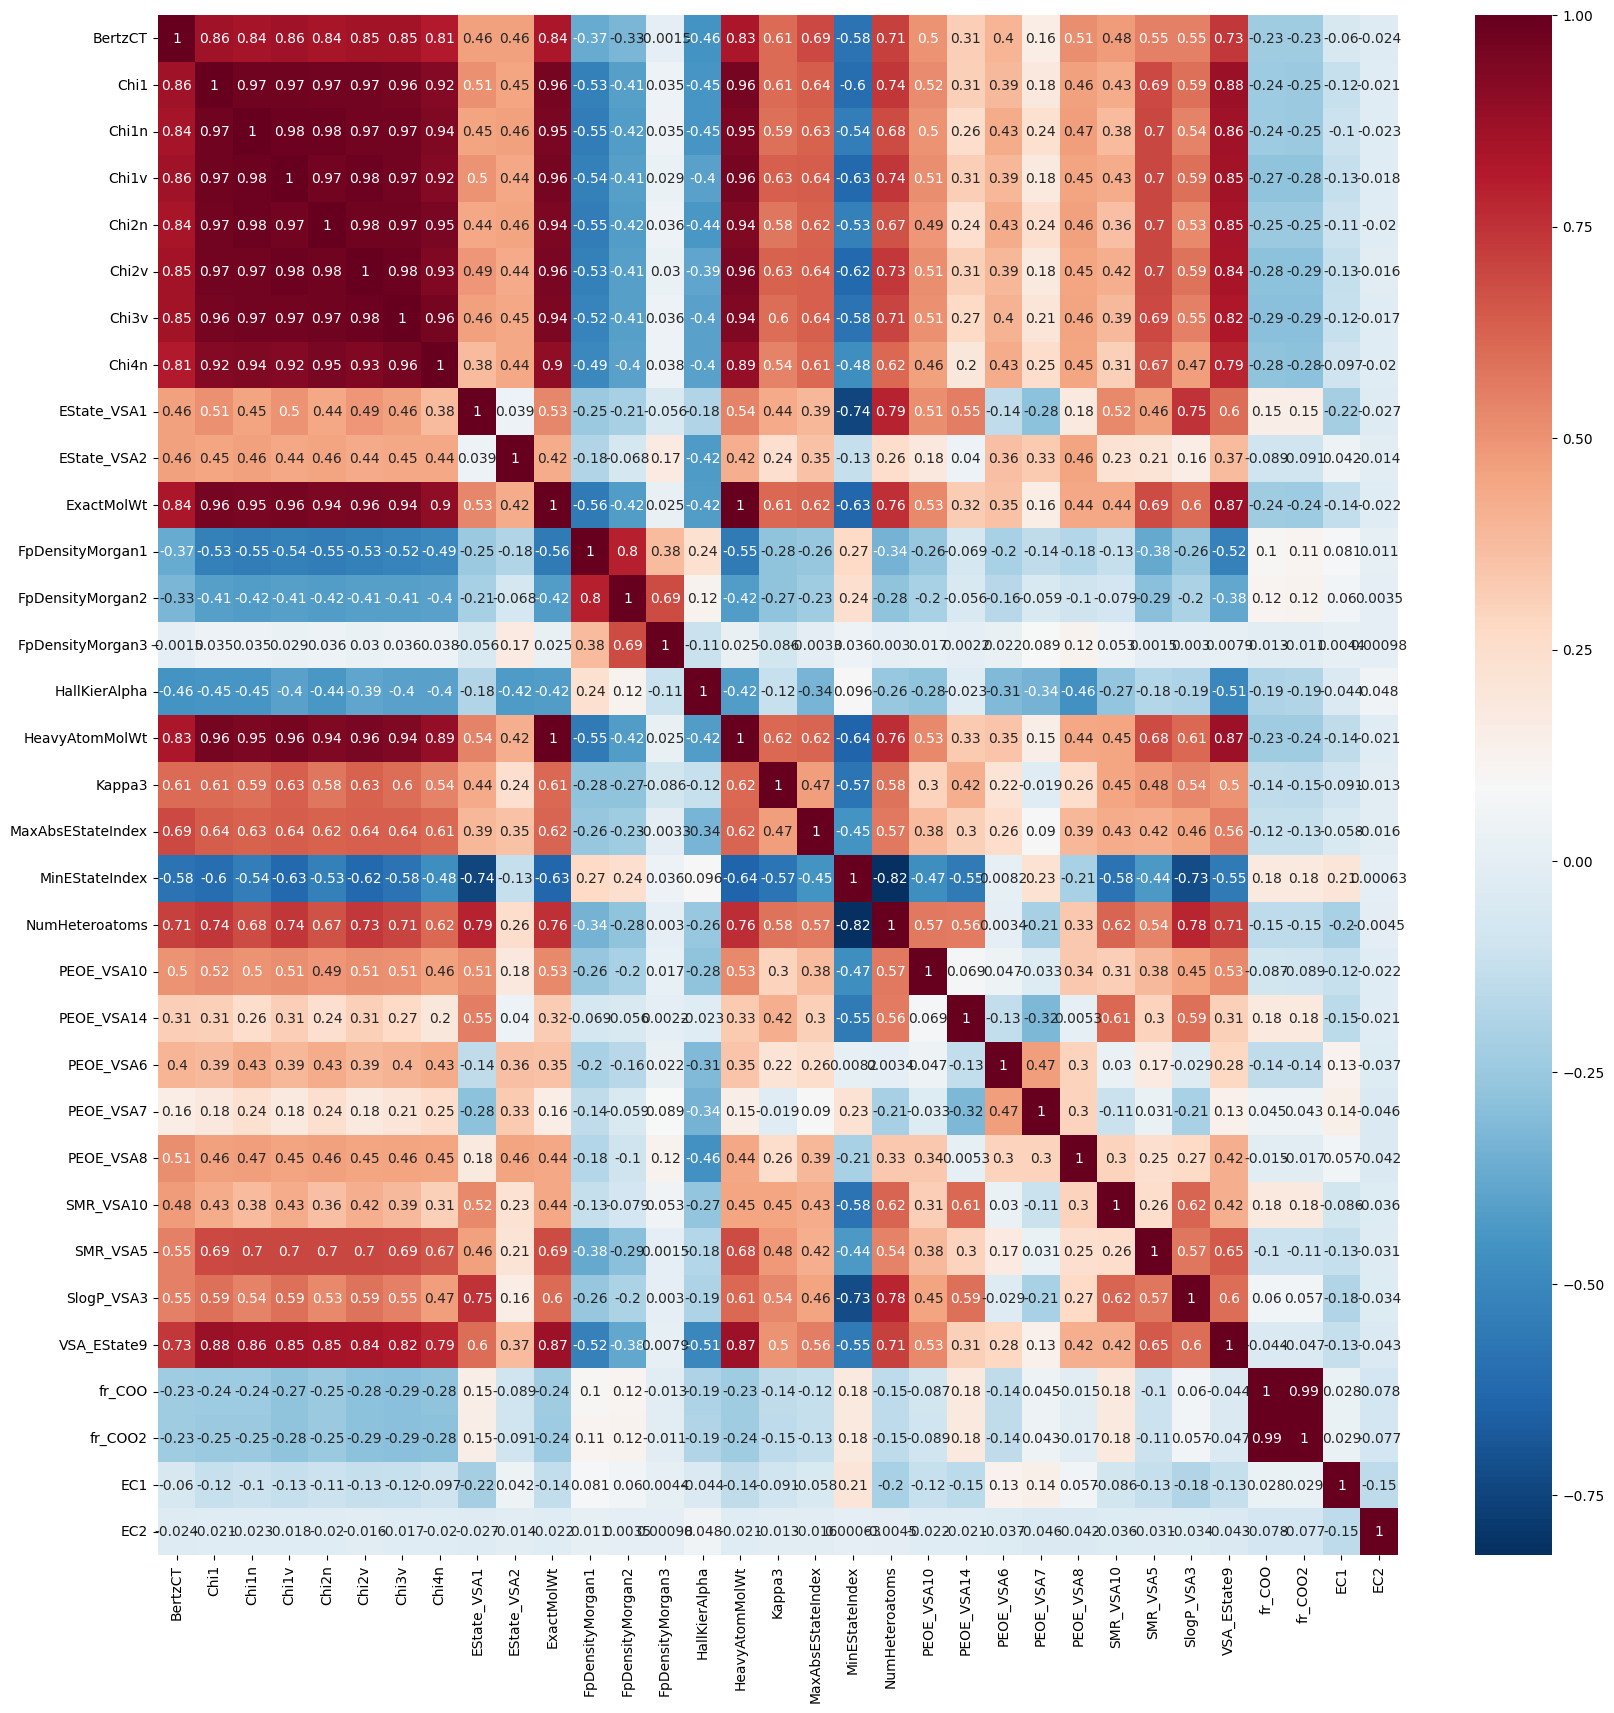

In [24]:
df_corr = pd.concat([df_X, df_y], axis=1).corr()

plt.figure(figsize = (20,20))
sns.heatmap(df_corr, annot=True, cmap='RdBu_r')
plt.show()
# ex.imshow(df_corr, color_continuous_scale='RdBu_r', text_auto=True, width=1000, height=1000)
## https://plotly.com/python/heatmaps/

In [47]:
df_X[['Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n']].prod(axis=1)

0         33.050515
1         16.412840
2        130.400620
3        218.885025
4          1.340137
            ...    
14833     61.785605
14834      0.000000
14835     45.615729
14836     69.549432
14837    221.244487
Length: 14838, dtype: float64

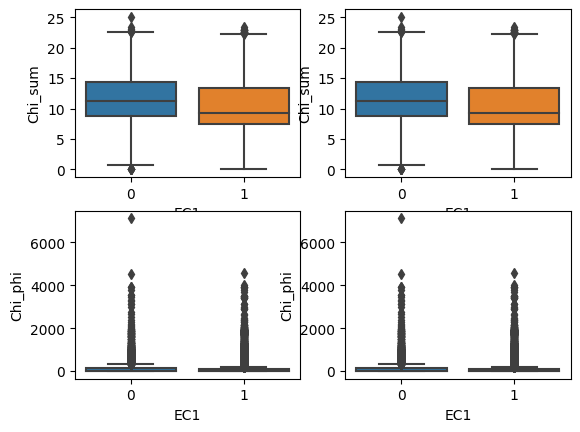

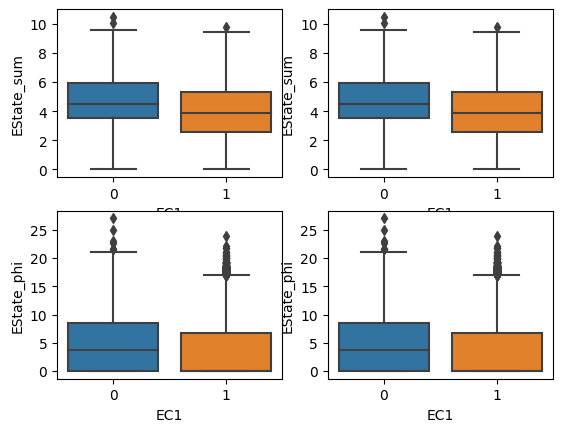

In [52]:
tmp = df_X.copy()
tmp['Chi_sum'] = df_X[['Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n']].sum(axis=1)
tmp['Chi_phi'] = df_X[['Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n']].prod(axis=1)
tmp['EState_sum'] = df_X[['EState_VSA1', 'EState_VSA2']].sum(axis=1)
tmp['EState_phi'] = df_X[['EState_VSA1', 'EState_VSA2']].prod(axis=1)
tmp = pd.concat([tmp, df_y], axis=1)

plt.subplot(221), sns.boxplot(data=tmp, x='EC1', y='Chi_sum')
plt.subplot(222), sns.boxplot(data=tmp, x='EC1', y='Chi_sum')
plt.subplot(223), sns.boxplot(data=tmp, x='EC1', y='Chi_phi')
plt.subplot(224), sns.boxplot(data=tmp, x='EC1', y='Chi_phi')
plt.show()

plt.subplot(221), sns.boxplot(data=tmp, x='EC1', y='EState_sum')
plt.subplot(222), sns.boxplot(data=tmp, x='EC1', y='EState_sum')
plt.subplot(223), sns.boxplot(data=tmp, x='EC1', y='EState_phi')
plt.subplot(224), sns.boxplot(data=tmp, x='EC1', y='EState_phi')
plt.show()

In [53]:
df_corr = tmp.corr()
df_corr['EC1'][(df_corr['EC1'] > 0.1)|(df_corr['EC1'] <= -0.1)]

Chi1             -0.121053
Chi1n            -0.103472
Chi1v            -0.126448
Chi2n            -0.105830
Chi2v            -0.127263
Chi3v            -0.117303
EState_VSA1      -0.219353
ExactMolWt       -0.136956
HeavyAtomMolWt   -0.139483
MinEStateIndex    0.208827
NumHeteroatoms   -0.203996
PEOE_VSA10       -0.116650
PEOE_VSA14       -0.152548
PEOE_VSA6         0.129887
PEOE_VSA7         0.142426
SMR_VSA5         -0.129752
SlogP_VSA3       -0.183771
VSA_EState9      -0.125762
Chi_sum          -0.116376
EState_sum       -0.131482
EC1               1.000000
EC2              -0.146059
Name: EC1, dtype: float64

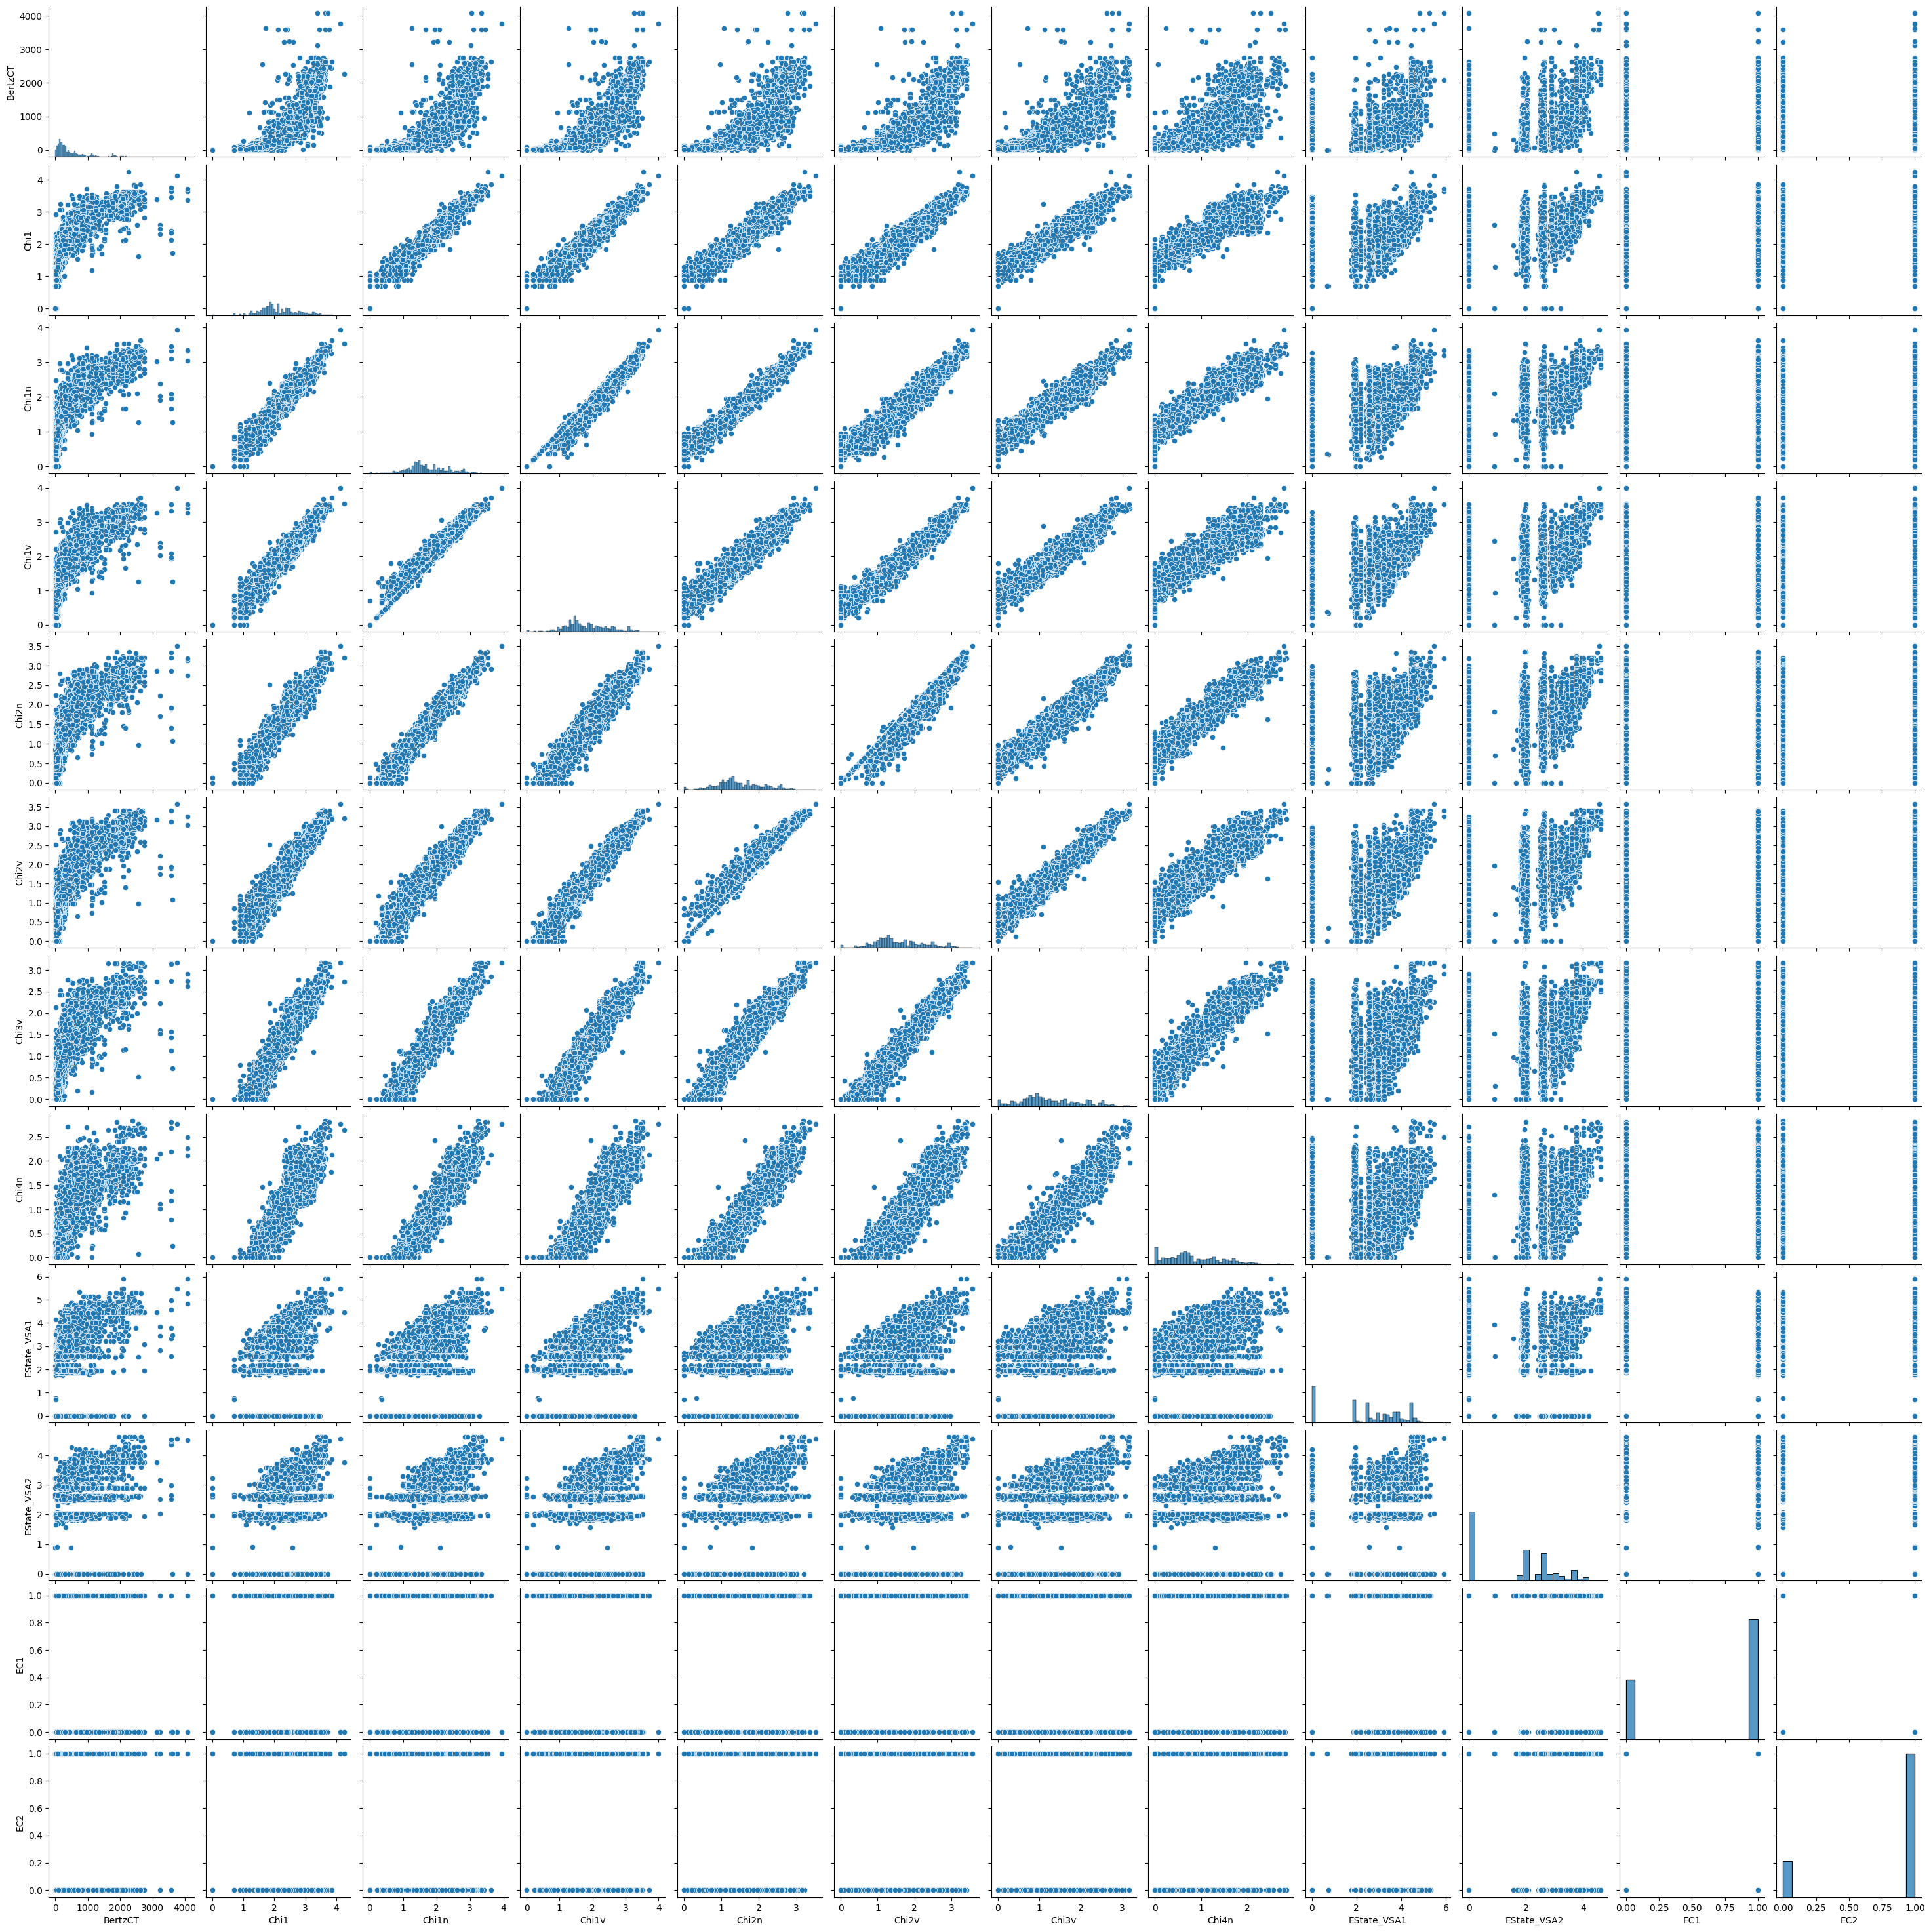

In [25]:
sns.pairplot(pd.concat([df_X.iloc[:, :10], df_y], axis=1))

In [ ]:
sns.pairplot(pd.concat([df_X.iloc[:, 10:20], df_y], axis=1))

In [38]:
# sns.pairplot(df)

In [39]:
# feature engineering to improve performance over 0.8

In [40]:
df.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

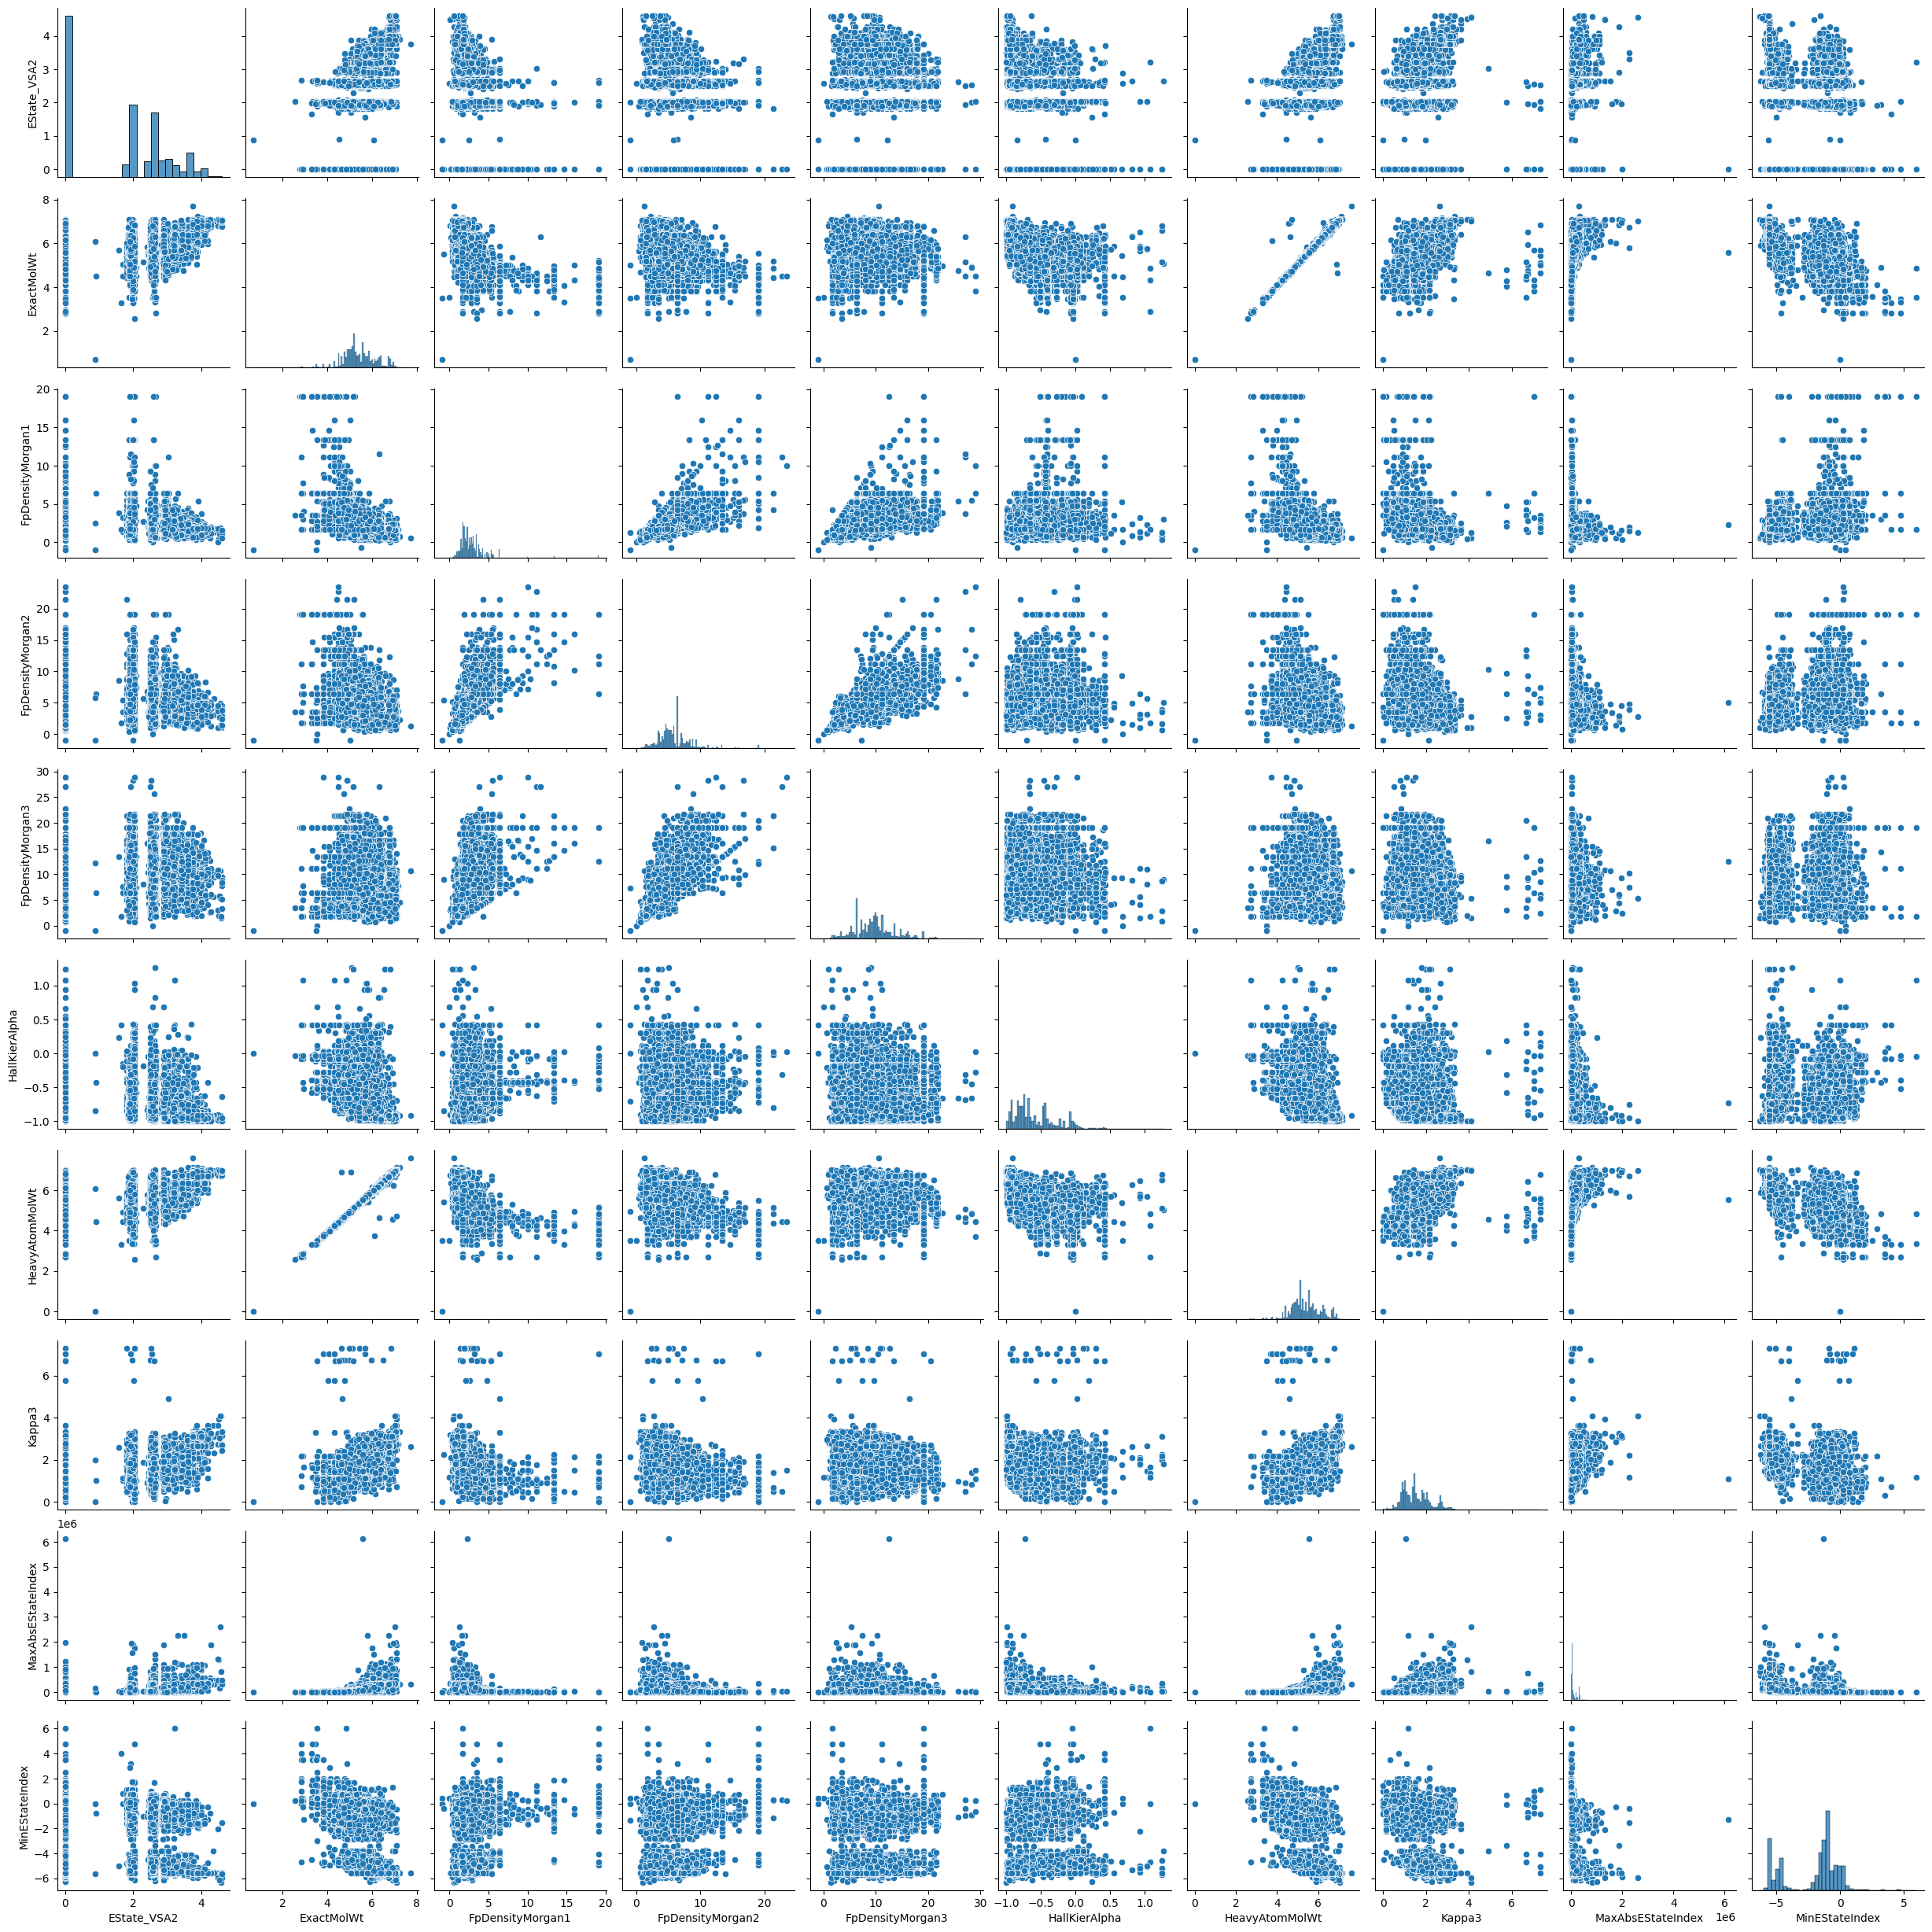

In [41]:
sns.pairplot(df.iloc[:, 10:20])